<a href="https://colab.research.google.com/github/pearl-yu/twitch_project/blob/main/dependent_variable_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Explore the dependent variables

We want to explore the big decision: becoming full time.   
This is based on the streaming time of the streamers.   
So we want to plot the distribution of streaming time. To see, if it looks like binormal distribution. 
- Weekly average: From the small sample, I believe there is the pattern. But we need a larger dataset.
- Or just pick one week. 

Another one is leaving. It'll be easy to include them into the sample tho. 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
video_df = pd.read_csv('video_df_merge.csv')

In [ ]:
video_df['created_at'] = pd.to_datetime(video_df['created_at']) 
video_df['created_week'] = video_df['created_at'].dt.week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


In [ ]:
print('Number of streamers in dataset:', video_df.user_id.nunique())
print('Time span of dataset:',video_df['created_at'].min(),video_df['created_at'].max())

Number of streamers in dataset: 90
Time span of dataset: 2013-07-12 13:00:03+00:00 2022-10-11 23:20:12+00:00


In [ ]:
# Organize to user-weekly level 
video_weekly_df = video_df.groupby(['user_id','created_week']).agg({'id':'count',
                                 'duration_min':[min,max,'mean','sum'],
                                 'view_count':['mean','sum']}).reset_index()
video_weekly_df.columns = ['_'.join(col) for col in video_weekly_df.columns]

video_weekly_df.head()

,user_id_,created_week_,id_count,duration_min_min,duration_min_max,duration_min_mean,duration_min_sum,view_count_mean,view_count_sum
0,104211056,22.0,1,1.116667,1.116667,1.116667,1.116667,7189.000000,7189.0
1,104211056,39.0,3,377.666667,488.566667,420.188889,1260.566667,47883.666667,143651.0
2,104211056,40.0,3,367.666667,379.366667,374.311111,1122.933333,66088.666667,198266.0
3,104211056,41.0,1,385.600000,385.600000,385.600000,385.600000,70199.000000,70199.0
4,113025683,18.0,4,12.716667,14.916667,13.737500,54.950000,0.500000,2.0


Text(0.5, 1.0, 'Streaming time Distribution')

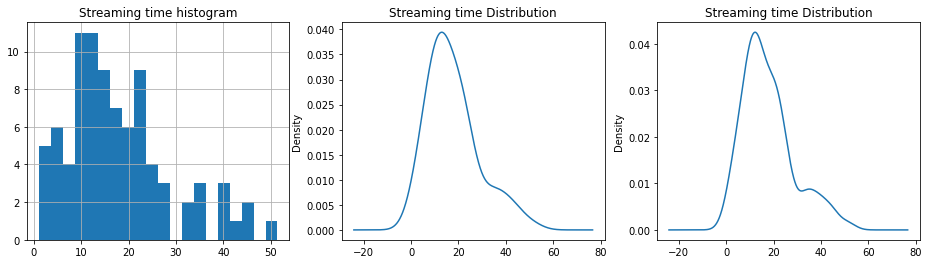

In [ ]:
# plot the average weekly streaming time distribution
# kde plot: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.kde.html
temp = video_weekly_df.groupby('user_id_')['duration_min_sum'].mean()
temp = temp[temp < 4000] / 60

plt.rcParams['figure.figsize'] = [16, 4]
plt.subplot(1,3,1)
temp.hist(bins = 20)
plt.title('Streaming time histogram')
plt.subplot(1,3,2)
temp.plot(kind='kde') # automatic bandwidth determination
plt.title('Streaming time Distribution')
plt.subplot(1,3,3)
temp.plot.kde(bw_method=0.3)
plt.title('Streaming time Distribution')

Was trying to take a look at the variation in streaming length overtime. The graph below is not readable. Not very helpful. 

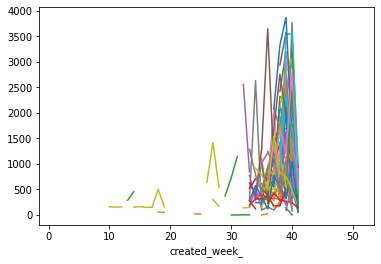

In [ ]:
# put it into wide form and plot
temp = video_weekly_df.pivot_table(values='duration_min_sum',
                                index='created_week_',
                                columns=['user_id_'])
temp.head()

temp[temp <4000].plot(legend=None)